In [7]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.6 MB/s eta 0:00:00


In [8]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0553cdc242fd5689cf93e495bcbeeef4667e756f58c171d5ab6504a4f38b93f4
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [9]:
#Importing libraries
import pandas as pd
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from cleantext import clean

In [10]:
with open('tweets.json') as jfile:
    d = json.load(jfile)
data = pd.DataFrame.from_dict(d, orient="index") #converting json into a dataframe

In [11]:
data.reset_index()

,index,tweet_author,tweet_text
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...,...
43342,551103473643945985,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
43343,551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
43344,550969541186953217,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
43345,550941480525635584,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


In [12]:
#Creating a function to check whether a tweet is positive or negative
analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    s=analyser.polarity_scores(text)["compound"]
    if s>=0:
        return "Positive"
    else:
        return "Negative"

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re


In [15]:
#Text cleaning
lemma=WordNetLemmatizer()
n=[]
for i in data["tweet_text"]:
    s=re.sub("[^a-zA-z]"," ",i)
    s=s.lower()
    s=s.split()
    k=[]
    for j in s:
        if j not in stopwords.words("english"):
            k.append(lemma.lemmatize(j))
    n.append(" ".join(k))

In [16]:
data["cleaned_text"]=n

In [17]:
data["Overall polarity"]=data["tweet_text"].apply(lambda x:sentiment(x))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


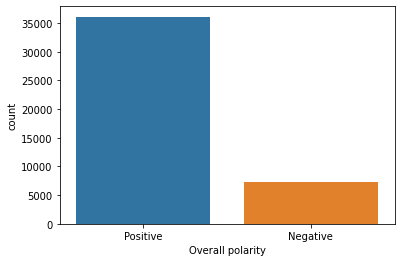

In [18]:
import seaborn as sns
sns.countplot(data["Overall polarity"])

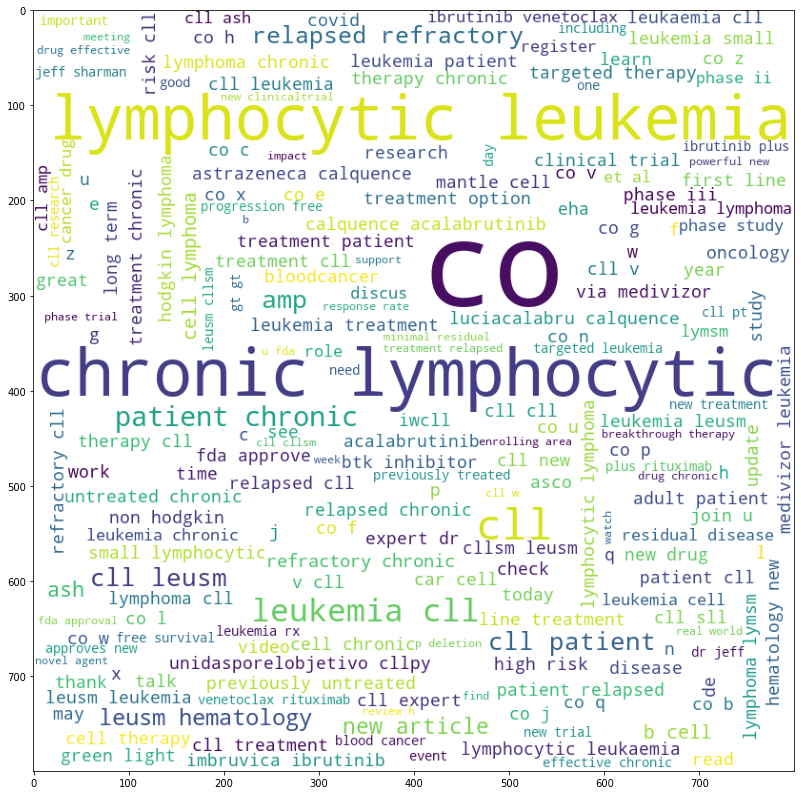

In [19]:
#Most found words in Positive 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df=data.loc[data["Overall polarity"]=="Positive"]
k=" ".join([i for i in df["cleaned_text"]])
wordcloud=WordCloud(width=800,height=800,background_color="white",min_font_size=10).generate(k)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud)

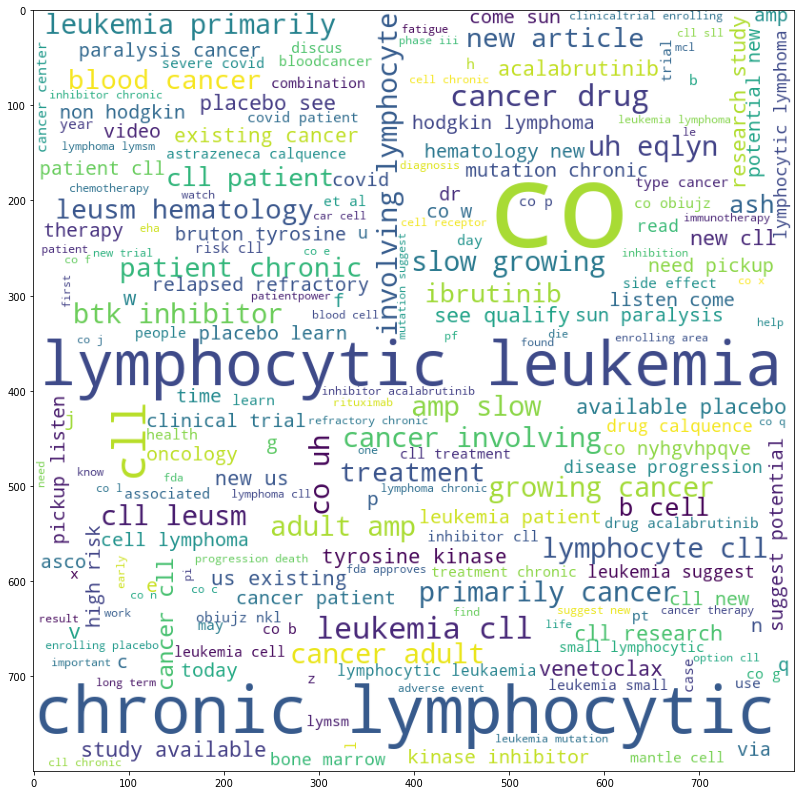

In [20]:
#Most found words in Negative
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df=data.loc[data["Overall polarity"]=="Negative"]
k=" ".join([i for i in df["cleaned_text"]])
wordcloud=WordCloud(width=800,height=800,background_color="white",min_font_size=10).generate(k)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud)

In [28]:
def text_cleaning(i):
  cleaned=clean(i,no_emoji=True)
  cleaned=cleaned.lower()
  k=re.sub("[^a-zA-z0-9]"," ",cleaned)
  k=cleaned.replace("#"," ")
  k=k.replace("@"," ")
  k=k.replace("%"," percentage")
  k=k.replace("\n"," ")
  k=k.split()
  l=[]
  for j in k:
    if j[:3]=="htt":
      pass
    else:
      l.append(j)
    
  return " ".join(l)

In [29]:
# import spacy
import spacy
 
# load spacy model
ner = spacy.load('en_core_web_sm')
 
def named_entity(sentence):
  k=[]
  # print entities
  for ent in ner(sentence).ents:
      v=[ent.text
  return ",".join(k)

In [30]:
data["Cleaned_text1"]=data["tweet_text"].apply(lambda x:text_cleaning(x))

In [31]:
data["Entity"]=data["Cleaned_text1"].apply(lambda x:named_entity(x))

In [47]:
l=[]
t=0
for i in data["Entity"]:
  if i.isdigit():
    t+=1
    l.append(i)


In [32]:
j=[]
for i in data["Entity"]:
  for k in i.split(","):
    j.append(k)

In [33]:
all=[]
for i in set(j):
  if i!="":
    all.append([j.count(i),i])
    


In [34]:
all.sort()
all=all[::-1]

In [35]:
count=[]
word=[]
for i,j in all:
  count.append(i)
  word.append(j)

In [36]:
pd.DataFrame({"Entity":word,"Frequency":count}).to_csv("objective1.csv")

In [37]:
k=pd.DataFrame({"Entity":word,"Frequency":count})

In [50]:
data[["Entity","tweet_author","Overall polarity"]].reset_index().drop("index",axis=1).to_csv("objective2.csv")

In [65]:
k=k[:15]


In [66]:
import plotly.express as px
print(" "*60,"Most frequent Entities")
fig = px.bar(k, x='Entity', y='Frequency',text_auto='.2s')
fig.show()

                                                             Most frequent Entities


In [67]:
data["No of characters"]=data["Cleaned_text1"].apply(lambda x:len(x))

In [69]:
k=[]
negative=data[data["Overall polarity"]=="Negative"]["tweet_author"]
for i in set(negative):
  k.append([list(negative).count(i),i])

k.sort()
k=k[::-1]
name=[]
count=[]
for i,j in k:
  count.append(i)
  name.append(j)
negative_df=pd.DataFrame({"Name":name,"Frequency":count})

In [70]:
nega=negative_df[negative_df["Frequency"]>50]

In [71]:
print(" "*65,"Name of the authors who post more negative tweets")
fig = px.bar(nega, x='Name', y='Frequency',text_auto='.2s')
fig.show()

                                                                  Name of the authors who post more negative tweets


In [72]:
k=[]
positive=data[data["Overall polarity"]=="Positive"]["tweet_author"]
for i in set(positive):
  k.append([list(positive).count(i),i])

k.sort()
k=k[::-1]
name=[]
count=[]
for i,j in k:
  count.append(i)
  name.append(j)
positive_df=pd.DataFrame({"Name":name,"Frequency":count})

In [73]:
posi=positive_df[positive_df["Frequency"]>300]

In [74]:
print(" "*75,"Name of the authors who post more positive tweets")
fig = px.bar(posi, x='Name', y='Frequency',text_auto='.2s')
fig.show()

                                                                            Name of the authors who post more positive tweets


In [75]:
r=pd.DataFrame(data["tweet_author"].value_counts()[:10]).reset_index()
r=r.rename(columns={"index":"Author name"})
h=[]
p=data[["tweet_author","No of characters"]].groupby("tweet_author").mean().reset_index()
for i in r["Author name"]:
  h.append(p[p["tweet_author"]==i]["No of characters"])


In [80]:
r

,Author name,tweet_author
0,Patient Power,1603
1,Paperbirds_Hematology,1510
2,VJHemOnc,1079
3,Oncology Tube,714
4,Medivizor,663
5,Club Libertad Limpeño,505
6,Targeted Oncology,496
7,Lymphoma Hub,489
8,"Raul Cordoba, MD, PhD",488
9,CLL Ireland,482


In [82]:
print(" "*57,"Name of the authors who post more tweets on twitter vs Total number of tweets")
fig = px.bar(r, x='Author name', y='tweet_author',text_auto='.2s')
fig.show()

                                                          Name of the authors who post more tweets on twitter vs Total number of tweets


In [91]:
x=data[["tweet_author","No of characters"]].groupby("tweet_author").mean().sort_values(by=["No of characters"]).reset_index()

In [92]:
x=x.sort_values(by=["No of characters"],ascending=False)[:10]

In [93]:
print(" "*57,"Name of the authors who post mostly lenghty tweet vs average length of the tweet")
fig = px.bar(x, x='tweet_author', y='No of characters',text_auto='.2s')
fig.show()

                                                          Name of the authors who post mostly lenghty tweet vs average length of the tweet
